Kimberly Adams

Spring 2024

# Predicting Tanzania EcoTourism

*In this project, I will attempt to build a multi-variable regression model to predict monetary amounts spent of tourism in Tanzania.*

In [1]:
# Import usual libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns

In [2]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

### Importing the Data

In [3]:
# Load the data
data_full = 'TanzaniaTourism/train.csv'
data_extra = 'TanzaniaTourism/test.csv'

In [4]:
# Import data from csv into dataframe and then display dataframe
data1 = pd.read_csv (data_full)
TourismData = pd.DataFrame(data1)
TourismData.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


### Exploratory Data Analysis

In [5]:
TourismData.dropna(inplace=True)

In [6]:
TourismData.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,3460.000000,3460.000000,3460.000000,3460.000000,3.460000e+03
mean,1.100578,1.128035,7.945087,2.759538,9.732343e+06
std,1.404676,1.248333,9.483474,4.296941,1.326048e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,2.000000,0.000000,1.160250e+06
50%,1.000000,1.000000,6.000000,0.000000,4.972500e+06
75%,1.000000,1.000000,10.000000,5.000000,1.226550e+07
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


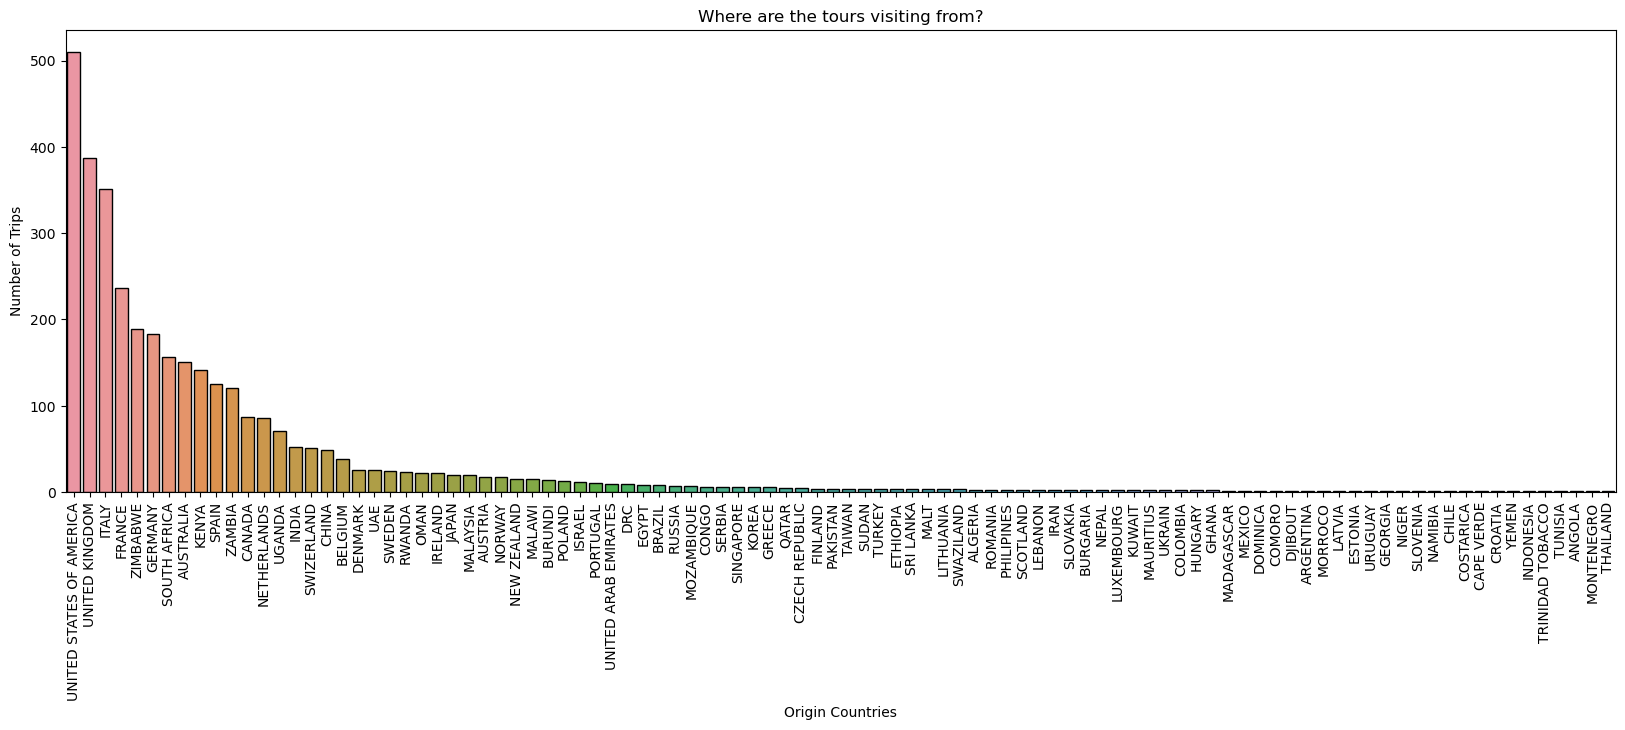

In [7]:
# Plot a graph of tour origin country
plt.figure(figsize=(20, 6))
sns.countplot(TourismData, x="country", edgecolor = "black",order = TourismData['country'].value_counts().index)
plt.title('Where are the tours visiting from?')
plt.xlabel('Origin Countries')
plt.xticks(rotation=90)
plt.ylabel('Number of Trips')
plt.show()

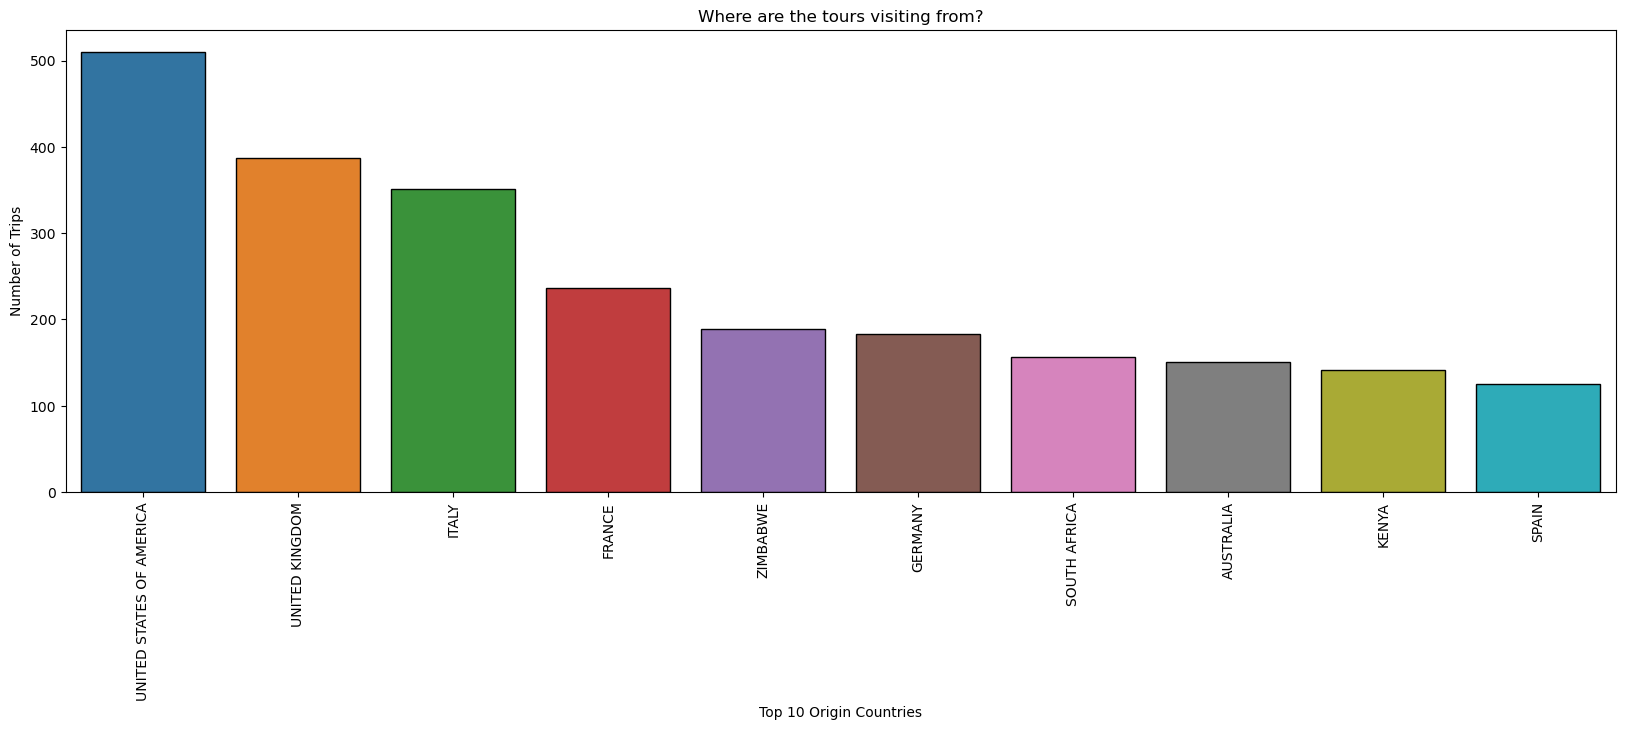

In [8]:
# Plot a graph of tour origin country
plt.figure(figsize=(20, 6))
sns.countplot(TourismData, x="country", edgecolor = "black",order = TourismData['country'].value_counts().iloc[:10].index)
plt.title('Where are the tours visiting from?')
plt.xlabel('Top 10 Origin Countries')
plt.xticks(rotation=90)
plt.ylabel('Number of Trips')
plt.show()

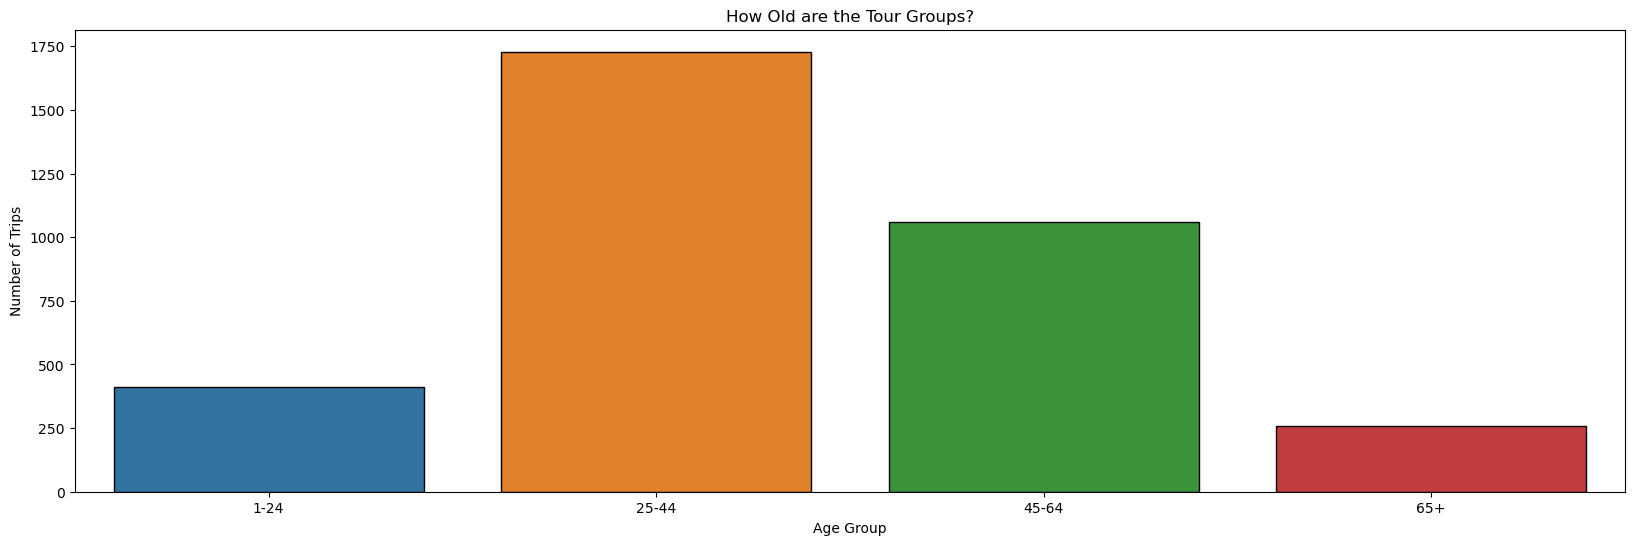

In [9]:
sort = TourismData.sort_values('age_group')

# Plot a graph of tour age group
plt.figure(figsize=(20, 6))
sns.countplot(sort, x="age_group", edgecolor = "black")
plt.title('How Old are the Tour Groups?')
plt.xlabel('Age Group')
plt.ylabel('Number of Trips')
plt.show()

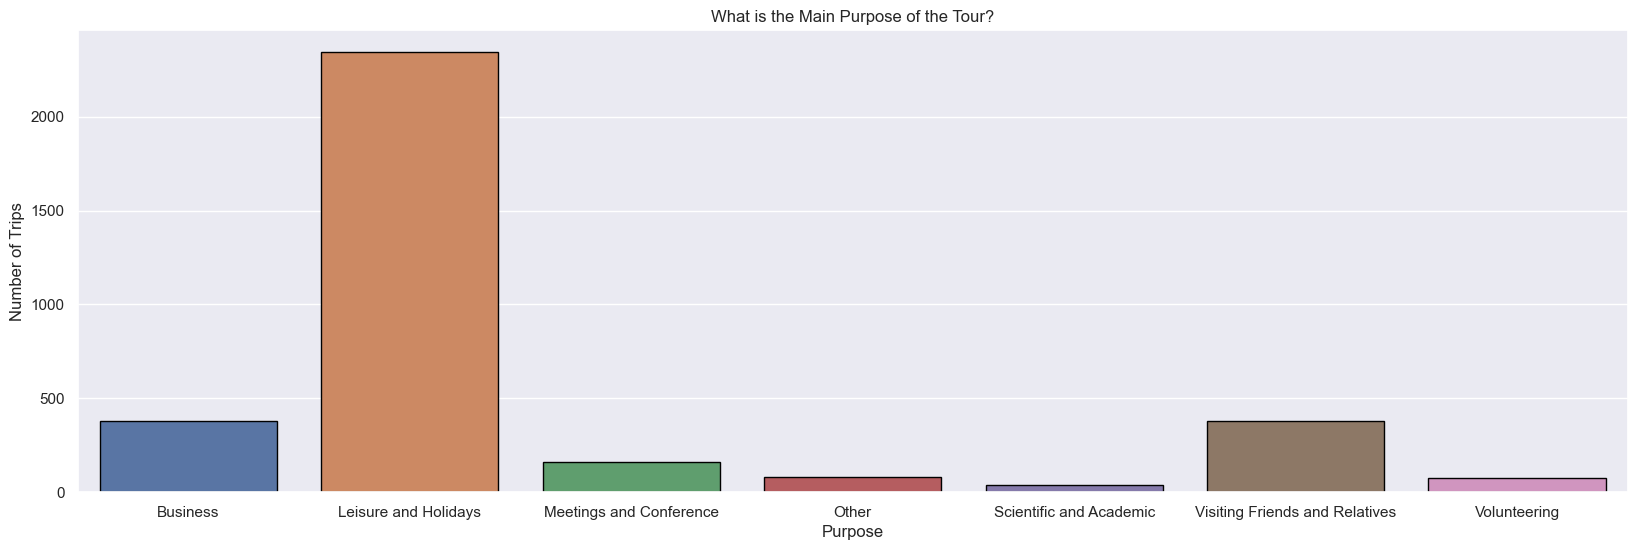

In [10]:
sort = TourismData.sort_values('purpose')

# Plot a graph of tour purpose
plt.figure(figsize=(20, 6))
sns.set(font_scale=1)
sns.countplot(sort, x="purpose", edgecolor = "black")
plt.title('What is the Main Purpose of the Tour?')
plt.xlabel('Purpose')
plt.ylabel('Number of Trips')
plt.show()

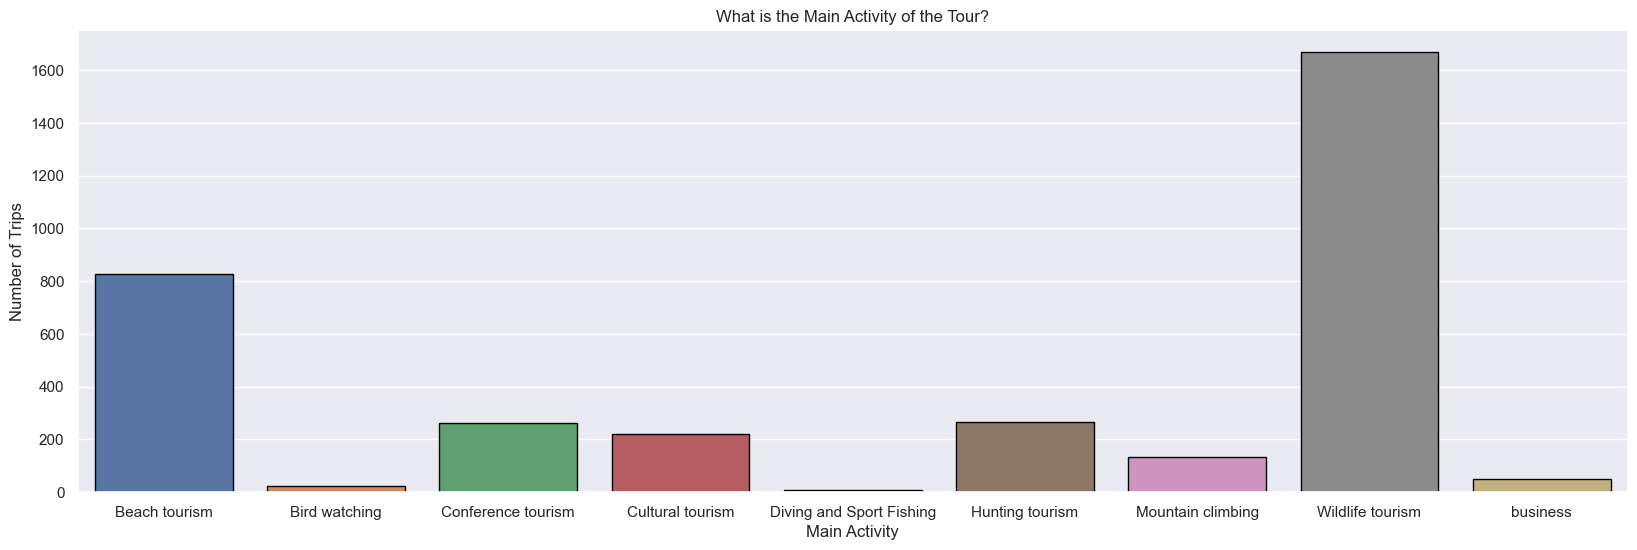

In [11]:
sort = TourismData.sort_values('main_activity')

# Plot a graph of the main tour activity
plt.figure(figsize=(20, 6))
sns.countplot(sort, x="main_activity", edgecolor = "black")
plt.xlabel('Main Activity')
plt.ylabel('Number of Trips')
plt.title('What is the Main Activity of the Tour?')
plt.show()

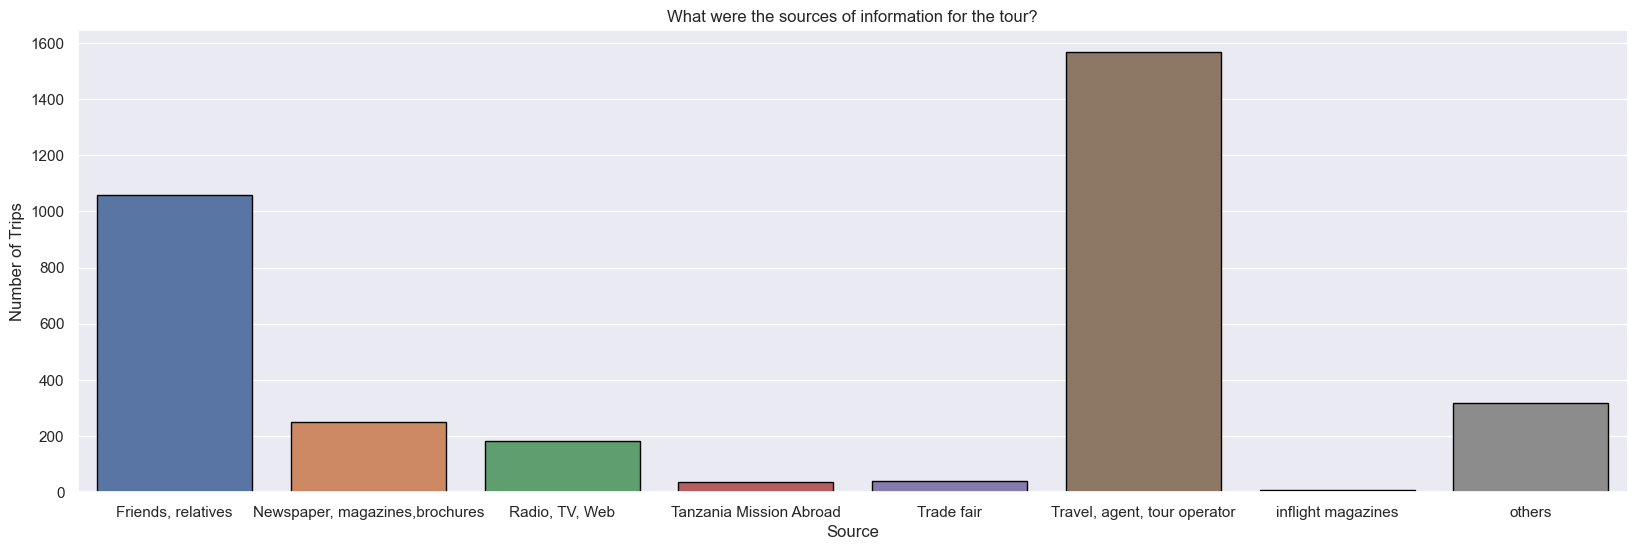

In [12]:
sort = TourismData.sort_values('info_source')

# Plot a graph of the main tour activity
plt.figure(figsize=(20, 6))
sns.countplot(sort, x="info_source", edgecolor = "black")
plt.xlabel('Source')
plt.ylabel('Number of Trips')
plt.title('What were the sources of information for the tour?')
plt.show()

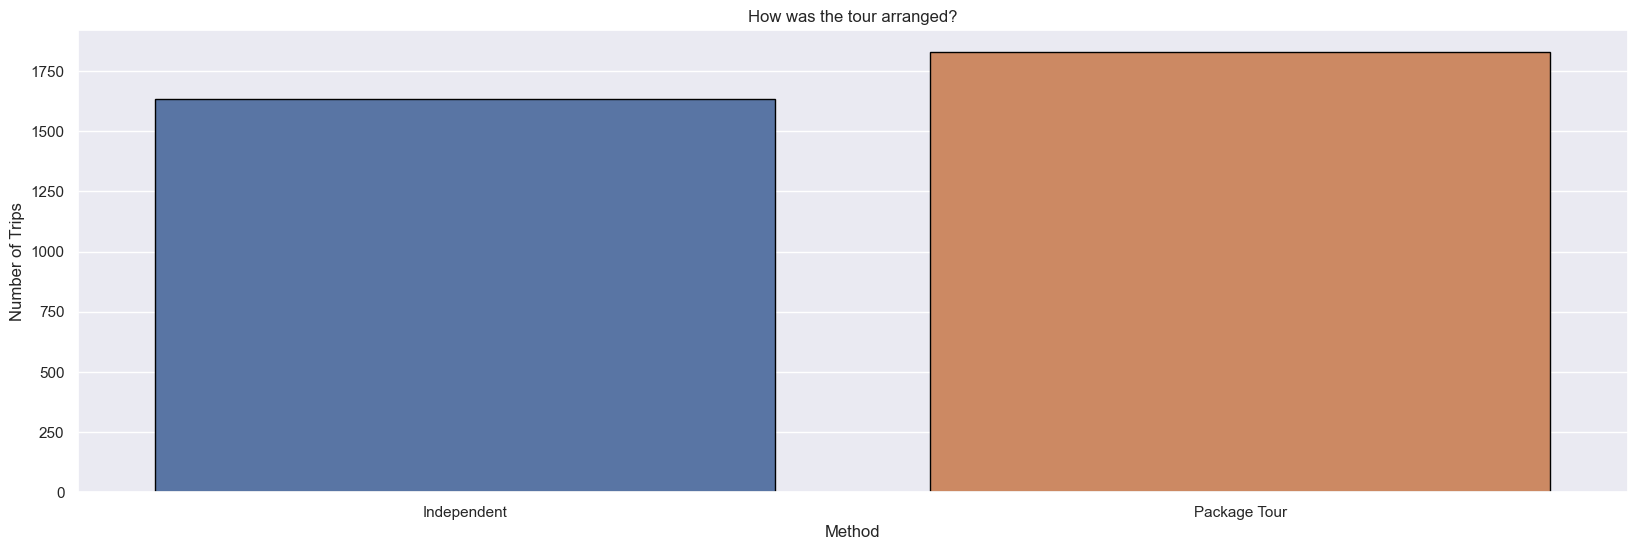

In [13]:
sort = TourismData.sort_values('tour_arrangement')

# Plot a graph of the main tour activity
plt.figure(figsize=(20, 6))
sns.countplot(sort, x="tour_arrangement", edgecolor = "black")
plt.xlabel('Method')
plt.ylabel('Number of Trips')
plt.title('How was the tour arranged?')
plt.show()

In [14]:
# Change yes and no to binary.
TourismData = TourismData.replace(to_replace=["Yes", "No"], value=[1,0])
TourismData['package_transport_int'] = TourismData['package_transport_int'].astype(str).astype(int)
TourismData['package_accomodation'] = TourismData['package_accomodation'].astype(str).astype(int)
TourismData['package_food'] = TourismData['package_food'].astype(str).astype(int)
TourismData['package_transport_tz'] = TourismData['package_transport_tz'].astype(str).astype(int)
TourismData['package_sightseeing'] = TourismData['package_sightseeing'].astype(str).astype(int)
TourismData['package_guided_tour'] = TourismData['package_guided_tour'].astype(str).astype(int)
TourismData['package_insurance'] = TourismData['package_insurance'].astype(str).astype(int)

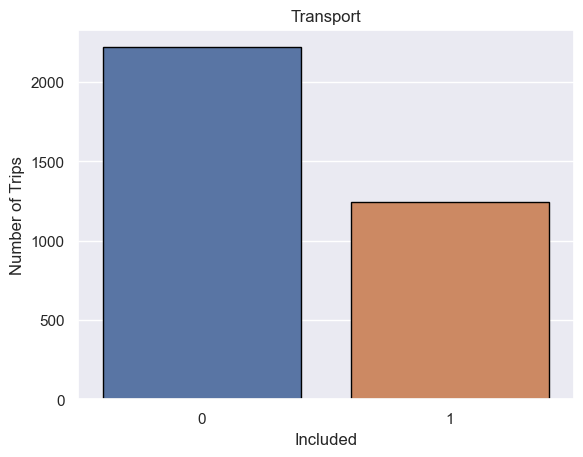

In [15]:
# Plot a graph of the tour package contents
sns.countplot(TourismData, x = 'package_transport_int', edgecolor = "black")
plt.xlabel('Included')
plt.ylabel('Number of Trips')
plt.title('Transport')
plt.show()

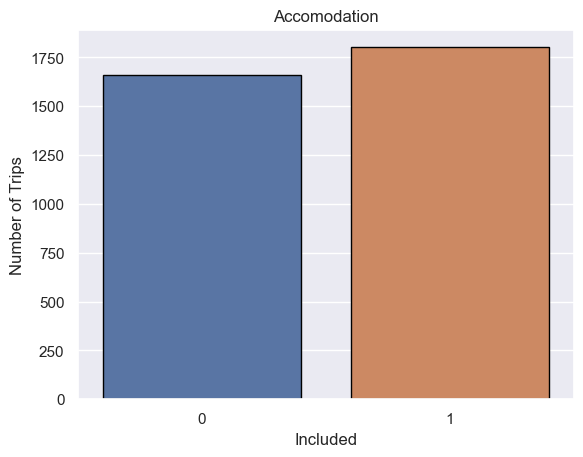

In [16]:
# Plot a graph of the tour package contents
sns.countplot(TourismData, x = 'package_accomodation', edgecolor = "black")
plt.xlabel('Included')
plt.ylabel('Number of Trips')
plt.title('Accomodation')
plt.show()

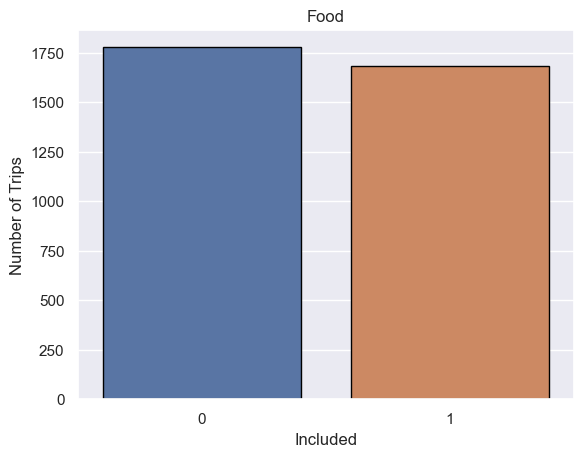

In [17]:
# Plot a graph of the tour package contents
sns.countplot(TourismData, x = 'package_food', edgecolor = "black")
plt.xlabel('Included')
plt.ylabel('Number of Trips')
plt.title('Food')
plt.show()

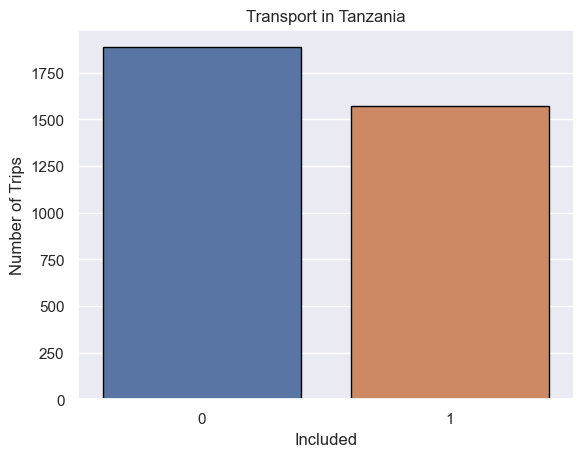

In [18]:
# Plot a graph of the tour package contents
sns.countplot(TourismData, x = 'package_transport_tz', edgecolor = "black")
plt.xlabel('Included')
plt.ylabel('Number of Trips')
plt.title('Transport in Tanzania')
plt.show()

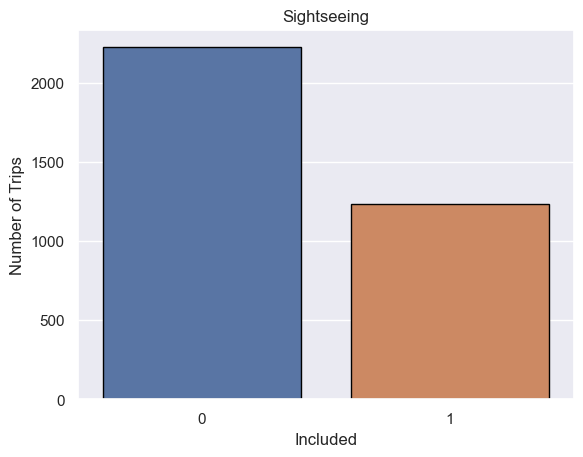

In [19]:
# Plot a graph of the tour package contents
sns.countplot(TourismData, x = 'package_sightseeing', edgecolor = "black")
plt.xlabel('Included')
plt.ylabel('Number of Trips')
plt.title('Sightseeing')
plt.show()

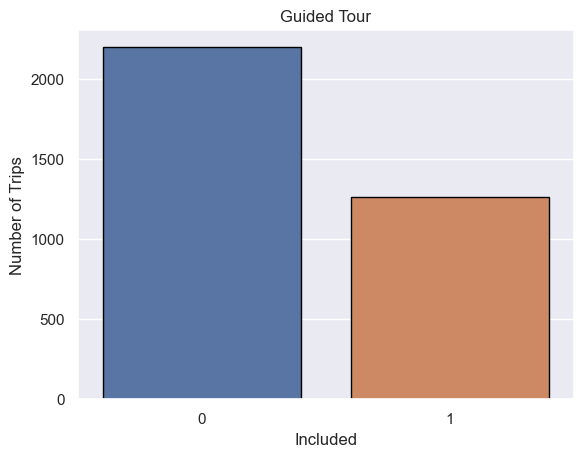

In [20]:
# Plot a graph of the tour package contents
sns.countplot(TourismData, x = 'package_guided_tour', edgecolor = "black")
plt.xlabel('Included')
plt.ylabel('Number of Trips')
plt.title('Guided Tour')
plt.show()

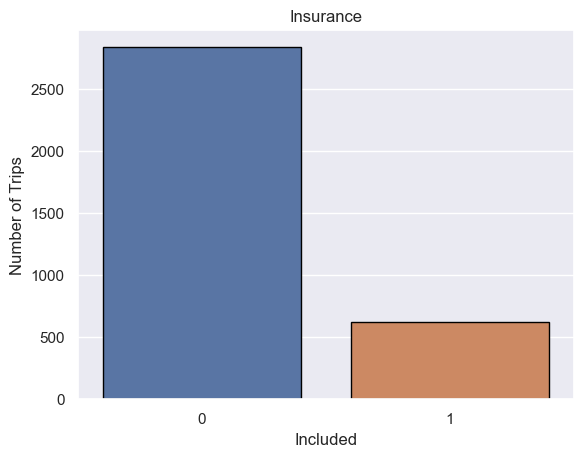

In [21]:
# Plot a graph of the tour package contents
sns.countplot(TourismData, x = 'package_insurance', edgecolor = "black")
plt.xlabel('Included')
plt.ylabel('Number of Trips')
plt.title('Insurance')
plt.show()

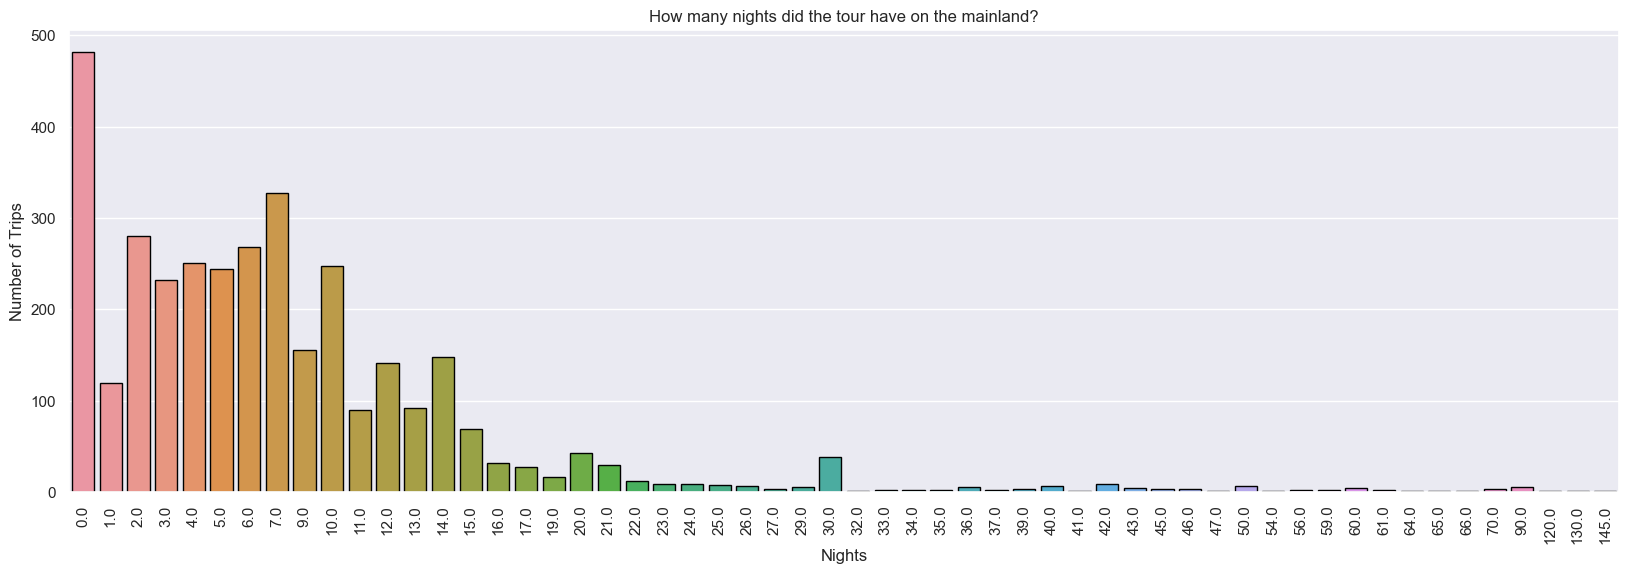

In [22]:
# Plot a graph of the main tour activity
plt.figure(figsize=(20, 6))
sns.countplot(sort, x="night_mainland", edgecolor = "black")
plt.xlabel('Nights')
plt.xticks(rotation=90, )
plt.ylabel('Number of Trips')
plt.title('How many nights did the tour have on the mainland?')
plt.show()

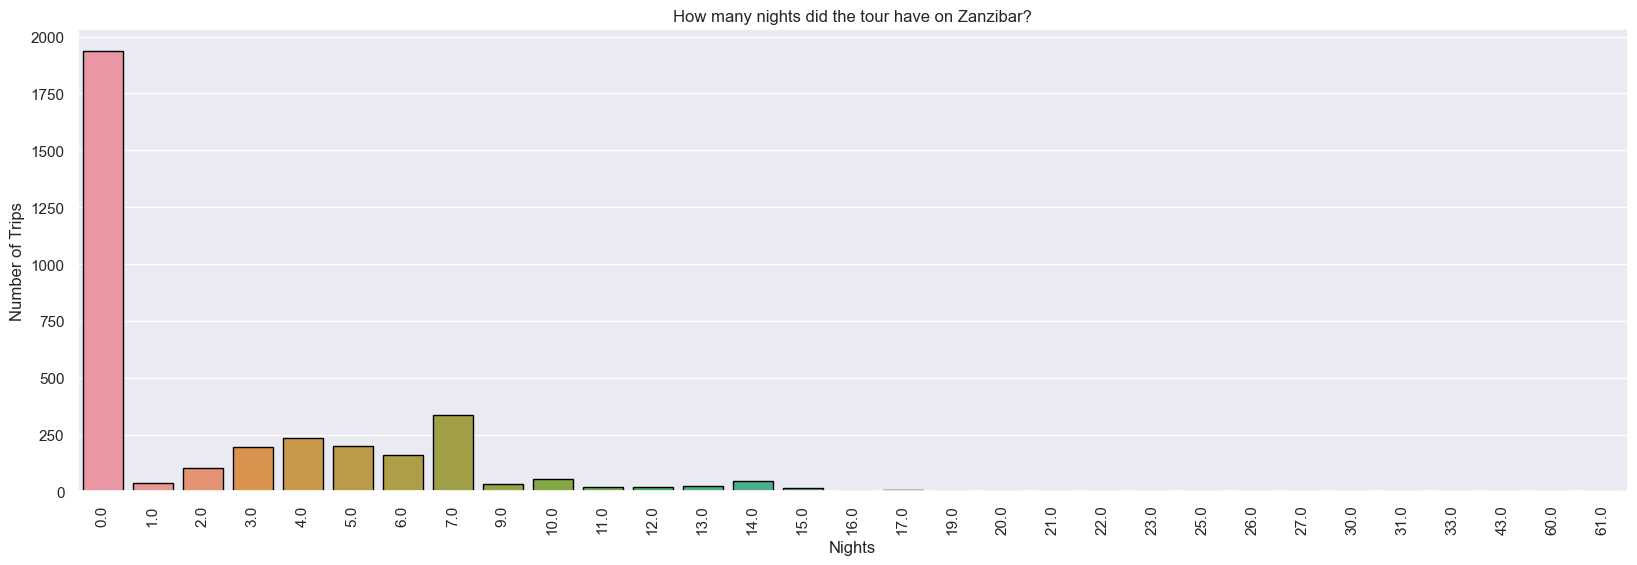

In [23]:
# Plot a graph of the main tour activity
plt.figure(figsize=(20, 6))
sns.countplot(sort, x="night_zanzibar", edgecolor = "black")
plt.xlabel('Nights')
plt.xticks(rotation=90)
plt.ylabel('Number of Trips')
plt.title('How many nights did the tour have on Zanzibar?')
plt.show()

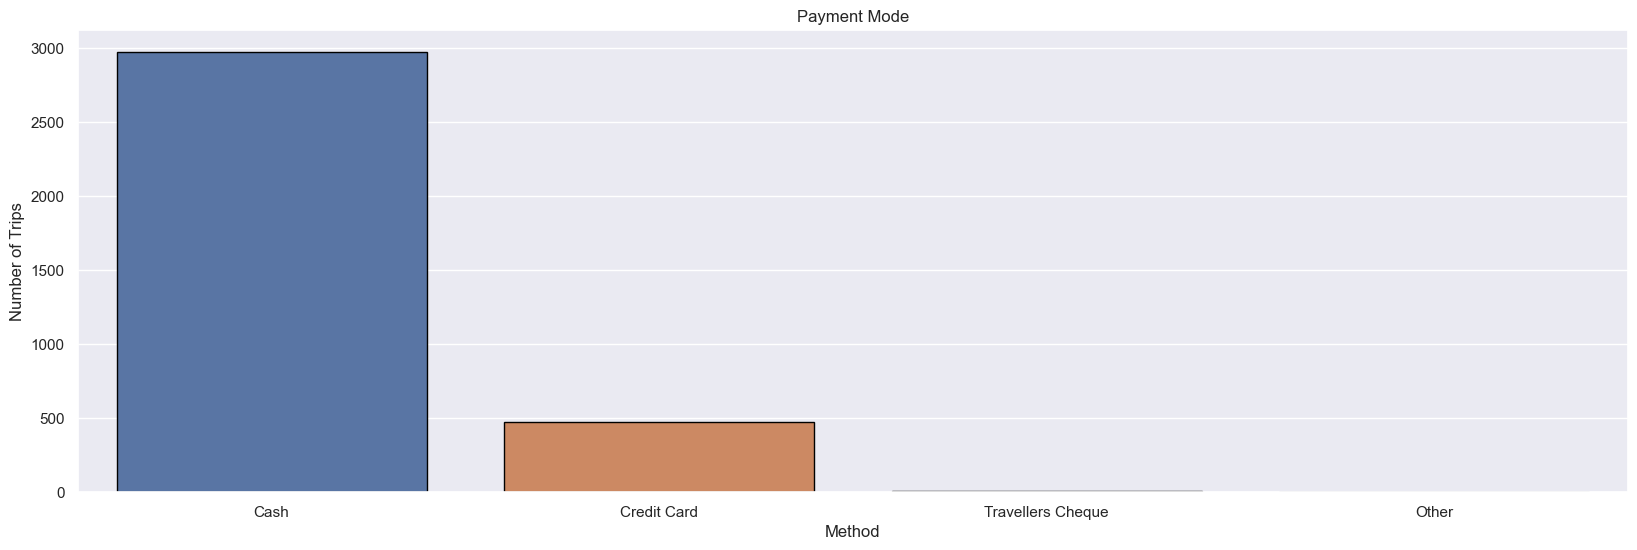

In [24]:
# Plot a graph of the main tour activity
plt.figure(figsize=(20, 6))
sns.set(font_scale=1)
sns.countplot(sort, x="payment_mode", edgecolor = "black")
plt.xlabel('Method')
plt.ylabel('Number of Trips')
plt.title('Payment Mode')
plt.show()

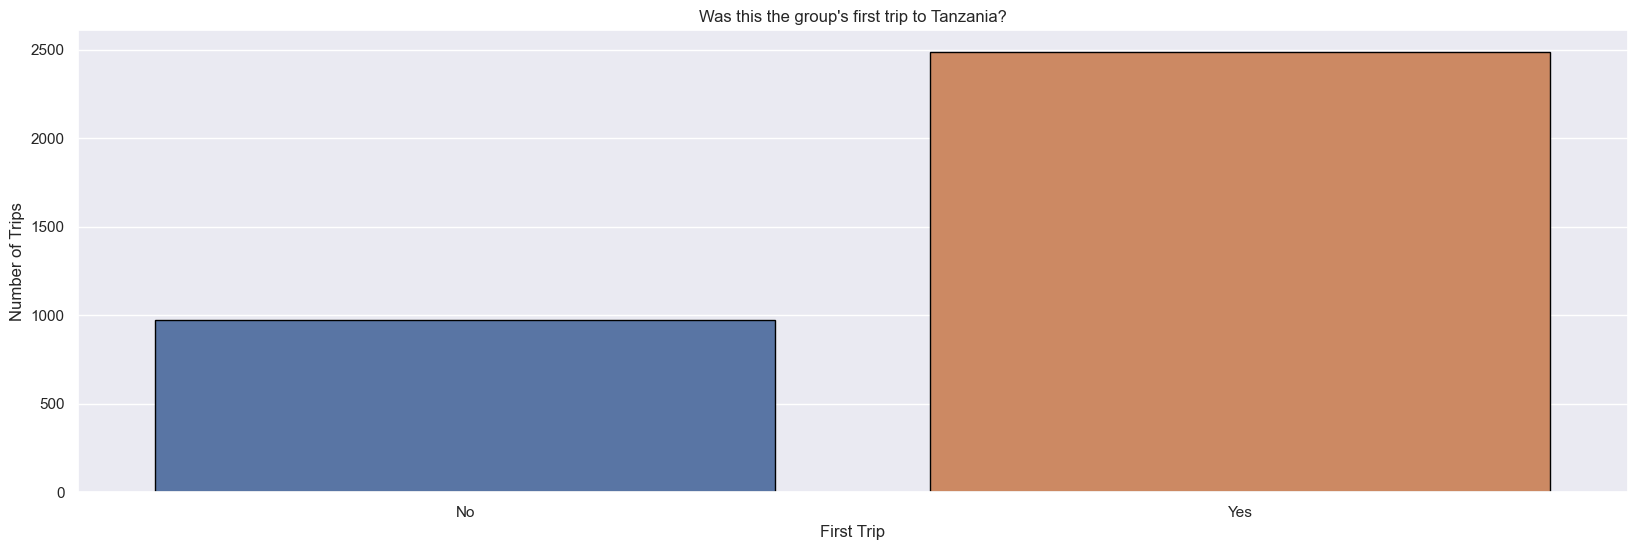

In [25]:
# Plot a graph of the main tour activity
plt.figure(figsize=(20, 6))
sns.set(font_scale=1)
sns.countplot(sort, x="first_trip_tz", edgecolor = "black")
plt.xlabel('First Trip')
plt.ylabel('Number of Trips')
plt.title("Was this the group's first trip to Tanzania?")
plt.show()

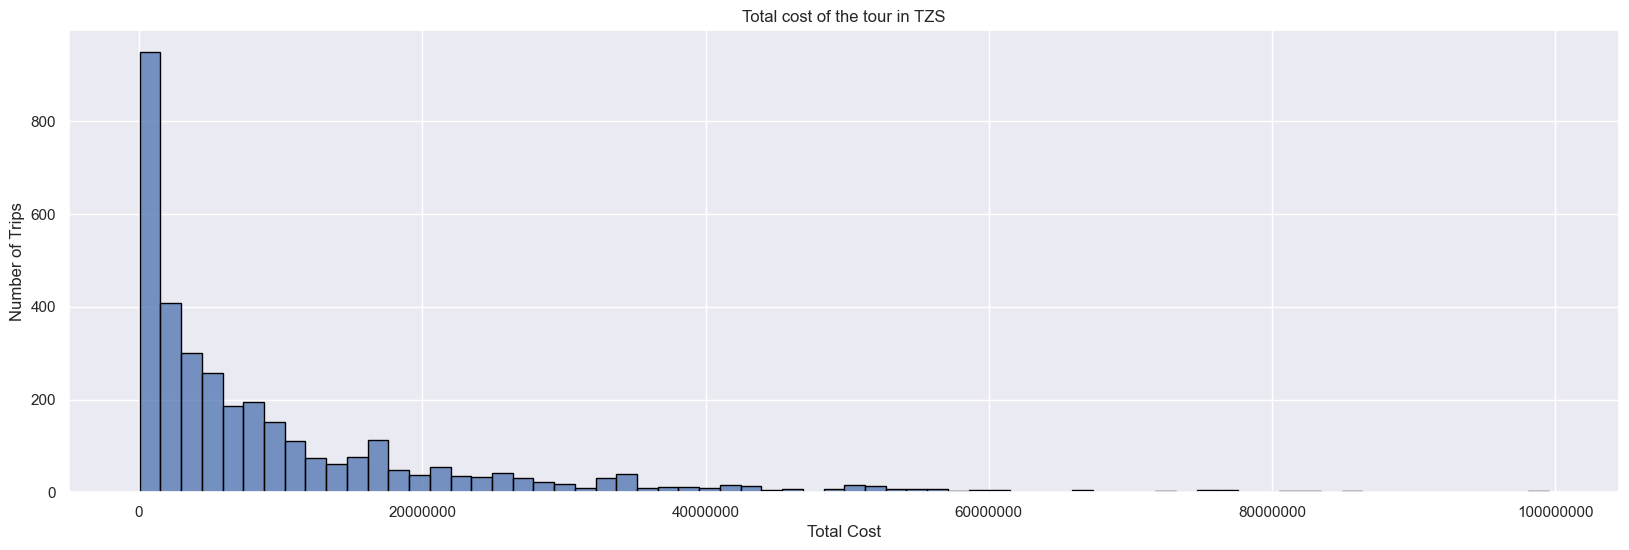

In [26]:
# Plot a graph of the main tour activity
plt.figure(figsize=(20, 6))
sns.set(font_scale=1)
sns.histplot(sort, x="total_cost", edgecolor = "black")
plt.xlabel('Total Cost')
plt.ticklabel_format(style='plain', axis='both')
plt.ylabel('Number of Trips')
plt.title("Total cost of the tour in TZS")
plt.show()

In [28]:
# Drop rows without total cost value
TourismData.dropna(axis=0, subset=['total_cost'], inplace=True)

In [29]:
# Compute total number of travelers on the tour
TourismData['TotalTravelers'] = TourismData['total_female'] + TourismData['total_male']

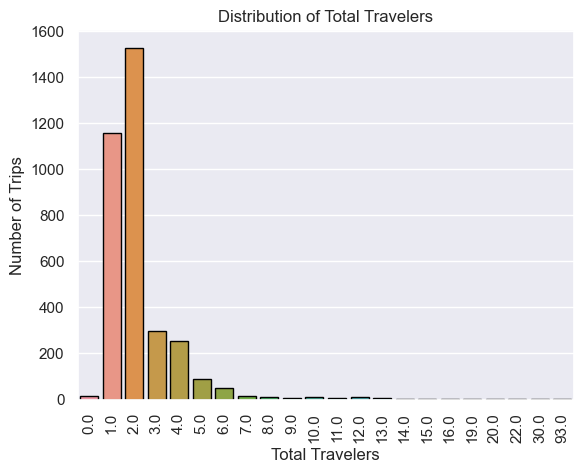

In [79]:
# Plot a graph of the total travelers
sns.countplot(TourismData, x="TotalTravelers", edgecolor = "black")
plt.xlabel('Total Travelers')
plt.xticks(rotation=90)
plt.ylabel('Number of Trips')
plt.title("Distribution of Total Travelers")
plt.show()

In [30]:
# Compute total tour length
TourismData['TourLength'] = TourismData['night_mainland'] + TourismData['night_zanzibar']

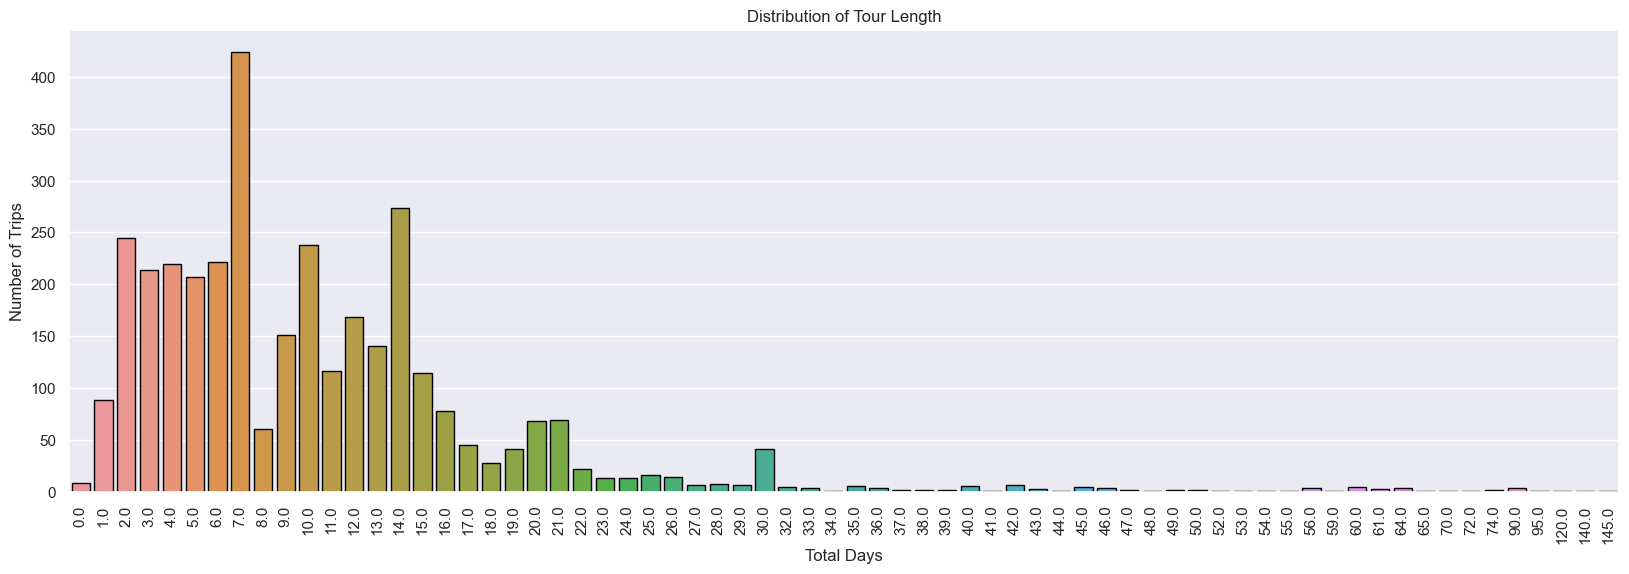

In [80]:
# Plot a graph of the total length
plt.figure(figsize=(20, 6))
sns.countplot(TourismData, x="TourLength", edgecolor = "black")
plt.xlabel('Total Days')
plt.xticks(rotation=90)
plt.ylabel('Number of Trips')
plt.title("Distribution of Tour Length")
plt.show()

In [31]:
# Compute total included components of the tour
TourismData['TourComponentsIncluded'] = TourismData['package_transport_int']+TourismData['package_accomodation']+TourismData['package_food']+TourismData['package_transport_tz']+TourismData['package_sightseeing']+TourismData['package_guided_tour']+TourismData['package_insurance']

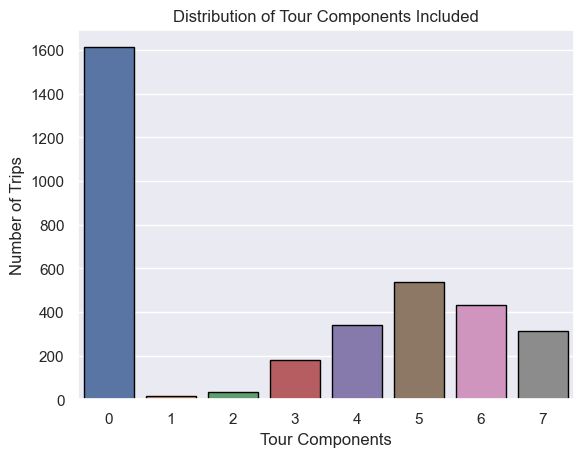

In [77]:
# Plot a graph of the total travelers
sns.countplot(TourismData, x="TourComponentsIncluded", edgecolor = "black")
plt.xlabel('Tour Components')
plt.ylabel('Number of Trips')
plt.title("Distribution of Tour Components Included")
plt.show()

In [32]:
TourismData

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,TotalTravelers,TourLength,TourComponentsIncluded
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,0,13.0,0.0,Cash,0,Friendly People,674602.5,2.0,13.0,0
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,0,1.0,31.0,Cash,0,Excellent Experience,3315000.0,1.0,32.0,0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,0,11.0,0.0,Cash,1,Friendly People,7790250.0,2.0,11.0,5
6,tour_1007,SOUTH AFRICA,45-64,Alone,0.0,1.0,Business,Mountain climbing,"Friends, relatives",Independent,...,0,9.0,0.0,Cash,1,Friendly People,466140.0,1.0,9.0,0
7,tour_1008,UNITED STATES OF AMERICA,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,1,10.0,3.0,Cash,1,Friendly People,3480750.0,2.0,13.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,tour_991,GERMANY,1-24,Friends/Relatives,2.0,0.0,Leisure and Holidays,Beach tourism,"Newspaper, magazines,brochures",Independent,...,0,12.0,7.0,Cash,1,No comments,331500.0,2.0,19.0,0
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,...,0,2.0,0.0,Credit Card,0,No comments,3315000.0,1.0,2.0,0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,1,11.0,0.0,Cash,1,Friendly People,10690875.0,2.0,11.0,7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,...,0,5.0,0.0,Credit Card,0,Friendly People,1160250.0,2.0,5.0,3


In [33]:
TourismData.dtypes

ID                         object
country                    object
age_group                  object
travel_with                object
total_female              float64
total_male                float64
purpose                    object
main_activity              object
info_source                object
tour_arrangement           object
package_transport_int       int64
package_accomodation        int64
package_food                int64
package_transport_tz        int64
package_sightseeing         int64
package_guided_tour         int64
package_insurance           int64
night_mainland            float64
night_zanzibar            float64
payment_mode               object
first_trip_tz               int64
most_impressing            object
total_cost                float64
TotalTravelers            float64
TourLength                float64
TourComponentsIncluded      int64
dtype: object

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

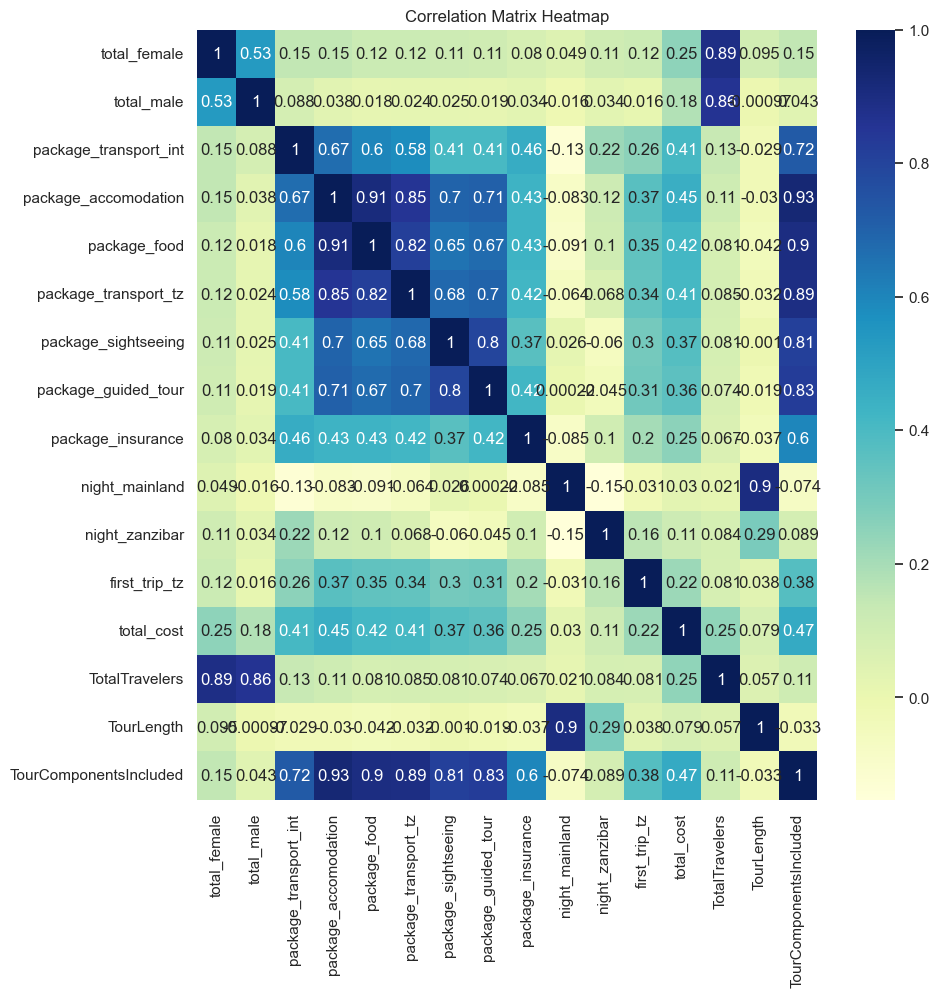

In [34]:
# Create a heat map of the correlations between variables to see highly correlated ones.
matrix = TourismData.corr()

# Build and color plot
f, ax = plt.subplots(figsize=(10, 10))
heatmap1 = sns.heatmap(matrix , annot=True, cmap="YlGnBu")
heatmap1.set_title('Correlation Matrix Heatmap')

### Splitting the Data into Train and Test Datasets

In [35]:
# Load package
from sklearn.model_selection import train_test_split

# Split into training data and test data for the modeling
train, test = train_test_split(TourismData, test_size=0.2, random_state = 10)

In [36]:
# Select all columns that are not `total_cost`
features = [i for i in train.columns if i not in ['total_cost']]

# Defining the features from the train and test values
xTrain = train[features]
xTest = test[features]

# Defining the target from the train and test values
yTrain = train[['total_cost']]
yTest = test[['total_cost']]

### One-hot Encoding

In [37]:
#one-hot encode
xTrain = pd.get_dummies(xTrain)
xTest = pd.get_dummies(xTest)
xTrain, xTest = xTrain.align(xTest, join='left', axis=1)

### Train Model

In [38]:
# Train default XGB model
from xgboost import XGBRegressor

model = XGBRegressor(random_state=0)
model.fit(xTrain, yTrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [66]:
# Calculate error stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predictions = model.predict(xTest)
# Calculate MAE
MAE = mean_absolute_error(yTest, predictions)
print("Mean Absolute Error:" , MAE)

Mean Absolute Error: 196843672.4268786


In [68]:
Model1MSE = mean_squared_error(yTest, predictions)
print("Model 1 Mean Squared Error = ", Model1MSE)

Model 1 Mean Squared Error =  3.8936380843818664e+16


In [54]:
Model1R2 = r2_score(yTest, predictions)
print("Model 1 R2 = ", Model1R2)

Model 1 R2 =  -257.81641961722636


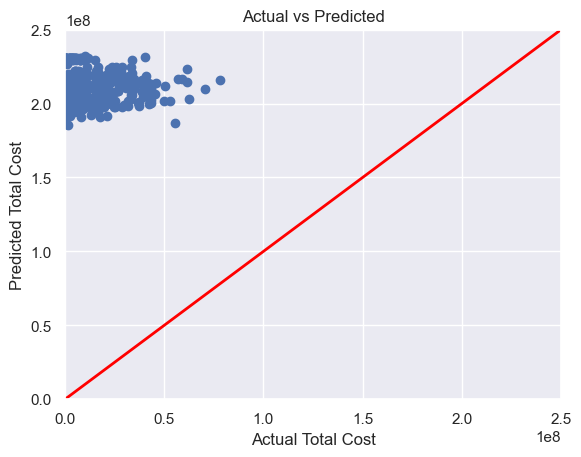

In [83]:
# Actual vs Predicted error
plt.scatter(yTest['total_cost'], predictions)
plt.xlabel('Actual Total Cost') 
plt.xlim(0, 250000000)
plt.ylabel('Predicted Total Cost') 
plt.ylim(0, 250000000)
plt.title('Actual vs Predicted')
plt.plot([0, 250000000], [0, 250000000], linewidth=2, color="red")
#plt.ticklabel_format(style='plain', axis='both')
plt.show()

In [41]:
# Optimize XGBRegessor model parameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

Model2 = XGBRegressor()

param_dist = {
    'learning_rate': uniform(0.001, 0.1 - 0.001),
    'n_estimators': randint(100, 1001),  
    'max_depth': randint(3, 8),
    'subsample': uniform(0.5, 0.5), 
    'colsample_bytree': uniform(0.5, 0.5), 
    'gamma': uniform(0, 0.2), 
    'reg_lambda': uniform(0, 10),  
    'reg_alpha': uniform(0, 0.5) 
}

random_search = RandomizedSearchCV(estimator=Model2, param_distributions=param_dist, 
                                   n_iter=100, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

random_search.fit(xTrain, yTrain)

best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'colsample_bytree': 0.7515681292900438, 'gamma': 0.17129796823766447, 'learning_rate': 0.06621066953027556, 'max_depth': 6, 'n_estimators': 115, 'reg_alpha': 0.03528437370021492, 'reg_lambda': 6.424192782063156, 'subsample': 0.513255655270811}


In [42]:
# Apply optimized parameters
Model2 = XGBRegressor(
    colsample_bytree = 0.8037724259507192, 
    gamma = 0.03410482473745831, 
    learning_rate = 0.0074401077055426725, 
    max_depth = 6, 
    n_estimators = 700, 
    reg_alpha = 0.4828160165372797, 
    reg_lambda = 8.08397348116461, 
    subsample = 0.6523068845866853)


Model2.fit(xTrain, yTrain)
predictions2 = Model2.predict(xTest)

# Calculate error rates
MAE2 = mean_absolute_error(yTest, predictions2)
print("Mean Absolute Error:" , MAE2)

Mean Absolute Error: 24863446.976011563


In [70]:
Model2MSE = mean_squared_error(yTest, predictions2)
print("Model 2 Mean Squared Error = ", Model2MSE)

Model 2 Mean Squared Error =  700712086187693.4


In [55]:
Model2R2 = r2_score(yTest, predictions2)
print("Model 2 R2 = ", Model2R2)

Model 2 R2 =  -3.6577465444739


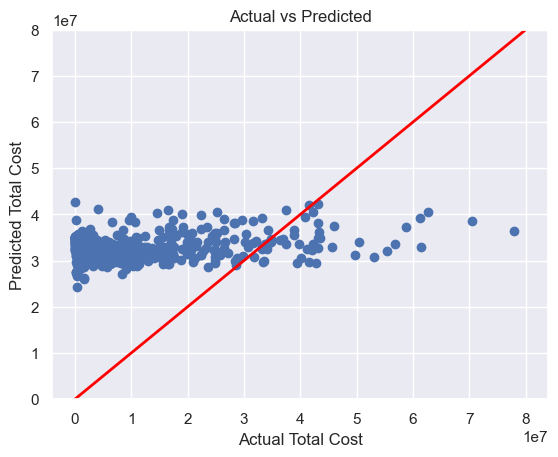

In [84]:
# Actual vs Predicted error
plt.scatter(yTest['total_cost'], predictions2)
plt.xlabel('Actual Total Cost') 
plt.ylabel('Predicted Total Cost') 
plt.ylim(0, 80000000)
plt.title('Actual vs Predicted')
plt.plot([0, 80000000], [0, 80000000], linewidth=2, color="red")
#plt.ticklabel_format(style='plain', axis='both')
plt.show()

In [44]:
# Load package
from sklearn.linear_model import LinearRegression

LinModel = LinearRegression()

In [45]:
# Select variable columns for multiple linear regression
# Defining the features from the train and test values
xTrain3 = xTrain[['TourComponentsIncluded', 'TotalTravelers', 'first_trip_tz', 'total_female']]
xTest3 = xTest[['TourComponentsIncluded', 'TotalTravelers', 'first_trip_tz', 'total_female']]

In [46]:
# Define linear regression model
LinModel.fit(xTrain3, yTrain)

predictionsTRAIN = LinModel.predict(xTrain3)
predictionsTEST = LinModel.predict(xTest3)

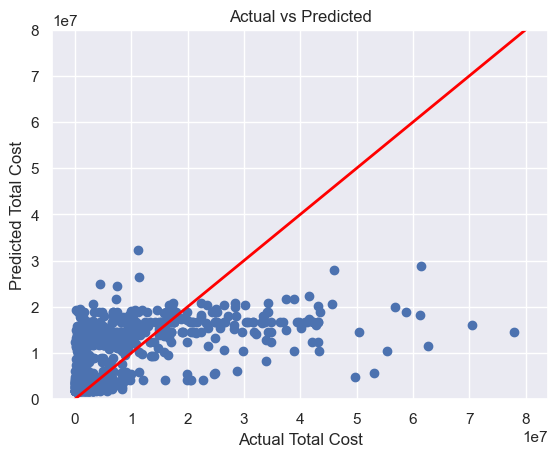

In [85]:
# Actual vs Predicted error
plt.scatter(yTest['total_cost'], predictionsTEST)
plt.xlabel('Actual Total Cost') 
plt.ylabel('Predicted Total Cost')
plt.ylim(0, 80000000)
plt.title('Actual vs Predicted')
plt.plot([0, 80000000], [0, 80000000], linewidth=2, color="red")
#plt.ticklabel_format(style='plain', axis='both')
plt.show()

In [48]:
# Load package
from sklearn import metrics

# Mean Absolute Error (MAE)
TrainMAE = metrics.mean_absolute_error(yTrain, predictionsTRAIN)
TestMAE = metrics.mean_absolute_error(yTest, predictionsTEST)
print("Train MAE = ", TrainMAE, "Test MAE = ", TestMAE)

Train MAE =  6971883.241939787 Test MAE =  6562336.980693886


In [71]:
# Mean Absolute Error (MAE)
TrainMAE = metrics.mean_squared_error(yTrain, predictionsTRAIN)
TestMAE = metrics.mean_squared_error(yTest, predictionsTEST)
print("Train MSE = ", TrainMAE, "Test MSE = ", TestMAE)

Train MSE =  135880251046793.0 Test MSE =  104307413986800.86


In [49]:
# R2
TrainR2 = LinModel.score(xTrain3, yTrain)
TestR2 = LinModel.score(xTest3, yTest)

print("Train R2 = ", TrainR2, "Test R2 = ", TestR2)

Train R2 =  0.25377777279465863 Test R2 =  0.30665175235768183
